# Question 4

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('PatientData.csv', sep = ',')
x = 1
for col in df.columns:
  name = 'Column '+str(x)
  df = df.rename(columns={col:name})
  x = x+1

df[df.columns[13:]]
df['Column 1'].dtype.name

'int64'

## Answers to Question 4 part a and c

In [4]:
#(a) How many patients and how many features are there?

print("Part a: number of patients: ",df.shape[0]+1) #subtracting 1 because last column is the disease itself
print("Part a: number of features: ",df.shape[1]-1) #adding 1 because index starts at 0


#(c) Are there missing values? Replace them with the average of the corresponding feature column
df=df.replace("?",np.nan)
print("Part c: Are there any NaN values?(True if ? were replaced with NaN): ",df.isnull().values.any())

print("part c: replace NaN with average of column: ")
df.fillna(df.mean())

Part a: number of patients:  452
Part a: number of features:  279
Part c: Are there any NaN values?(True if ? were replaced with NaN):  True
part c: replace NaN with average of column: 


/var/folders/xk/szxzvgq138ndv5c88q9xfh1m0000gn/T/ipykernel_23145/2634372972.py:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean())


,Column 1,Column 2,Column 3,Column 4,Column 5,Column 6,Column 7,Column 8,Column 9,Column 10,...,Column 271,Column 272,Column 273,Column 274,Column 275,Column 276,Column 277,Column 278,Column 279,Column 280
0,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
1,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
2,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
3,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
4,13,0,169,51,100,167,321,174,91,107,...,-0.6,12.2,-2.8,0.0,0.0,0.9,2.2,13.5,31.1,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
447,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
448,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
449,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1


## Answer to Question 4 part b

To comment on what the first 4 features are we can plot them and understand the values given the context of the dataset. We know that Column 280 is the medical condition of a patient. When we plot Column 1 we can see that the Max Values are not more than 100 and do not go below 0; we can assume that this is the age of all patients column in the dataset. 

Column 2 can be plotted on a pie chart as we can see there are only two values in the column : 0 and 1. This could mean that this column represents the gender of the patient in a binary format. 

Column 3, 4  are difficult to judge but based on the plots we can assume that Column 3 and Column 4 represent heart and the heart beats per minute for each patient as the values (barring a few outliers) are consistent with the average heart rates. 

<AxesSubplot:>

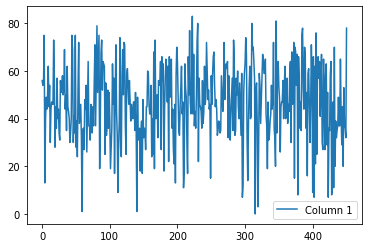

In [5]:
#(b) What is the meaning of the first 4 features? See if you can understand what they mean.

df.plot(y='Column 1')

array([<AxesSubplot:ylabel='None'>], dtype=object)

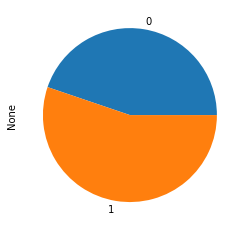

In [6]:
#(b) What is the meaning of the first 4 features? See if you can understand what they mean.

df.groupby('Column 2').size().plot(kind='pie', subplots=True)

<AxesSubplot:>

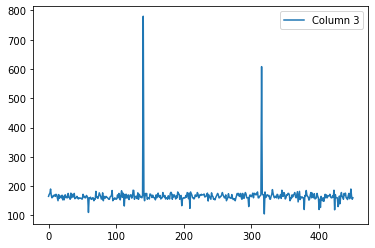

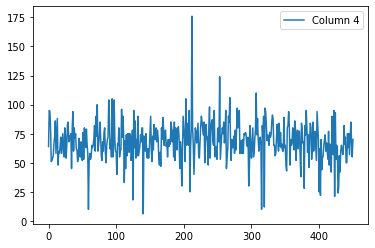

In [7]:
#(b) What is the meaning of the first 4 features? See if you can understand what they mean.

df.plot(y='Column 3')
df.plot(y='Column 4')

## Answer to Question 4 part d

Statistically the measure of which value affects the target the most is the Correlation Coefficient. This can be calculated in dataframes using the corr() method. The correlation value is in the range of 1 through -1 and the sign of the value descirbes a positive or negative correlation. For exmaple in the patient dataset Column 163 has a negative value meaning if Column 163 value goes up then the affect on Column 280 (target) will make this value go down. Values above 0.7 and lower than -0.7 are considered to represent a high coreelation and values between 0.3 and -0.3 are considered to be negligible coreelation with values closer (or equal) to 0 representing no correlation. 

in this dataset we can assess the highest and lowest correlation values numerical values to judge which feature has the most affect on Column 280. We can say that Column 91, 93 and 5 have the most affect on COlumn 280 with correlation values more than 0.3. 

In [8]:
#(d) How could you test which features strongly influence the patient condition and which do not?

print("Hightest Correlation Values Negative and positive\n",df.corr().sort_values(by=['Column 280'], ascending=False)['Column 280'].dropna())

corrVal=df.corr()

leastCorr=[]

for item in corrVal['Column 280']:
    if item>=-0.3 and item<=0.3:
        leastCorr.append(item)
print("Lowest Correlation Values Negative and positive\n", corrVal['Column 280'].loc[corrVal['Column 280'].isin(leastCorr)])



Hightest Correlation Values Negative and positive
 Column 280    1.000000
Column 91     0.369935
Column 5      0.323919
Column 93     0.316655
Column 103    0.283321
                ...   
Column 271   -0.165585
Column 169   -0.173591
Column 2     -0.176193
Column 243   -0.189687
Column 163   -0.197783
Name: Column 280, Length: 258, dtype: float64
Lowest Correlation Values Negative and positive
 Column 1     -0.096395
Column 2     -0.176193
Column 3      0.005325
Column 4     -0.091773
Column 6     -0.101887
                ...   
Column 274   -0.036863
Column 276   -0.088937
Column 277   -0.033325
Column 278    0.002868
Column 279   -0.011539
Name: Column 280, Length: 254, dtype: float64
